In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

(1088, 1200, 3)

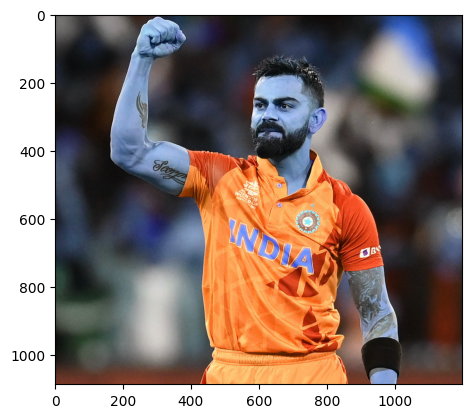

In [9]:
img = cv2.imread("test_images/17kohli1.jpg")
plt.imshow(img)
img.shape

In [10]:
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
gray.shape

(1088, 1200)

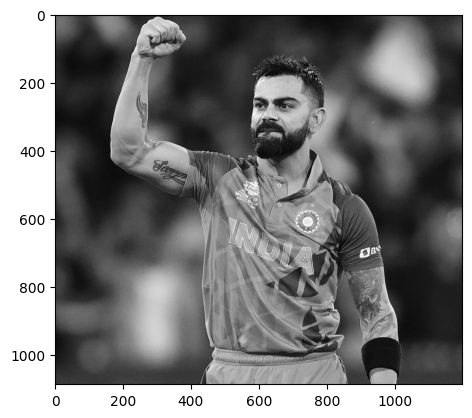

In [13]:
plt.imshow(gray , cmap='gray')

In [14]:
face_cascades = cv2.CascadeClassifier("OpenCV/haarcascades/haarcascade_frontalface_default.xml")
eye_cascades = cv2.CascadeClassifier("OpenCV/haarcascades/haarcascade_eye.xml")

faces = face_cascades.detectMultiScale(gray , 1.3 , 5)
faces

array([[538, 189, 199, 199]])

In [15]:
(x,y,w,h) = faces[0]
x,y,w,h

(538, 189, 199, 199)

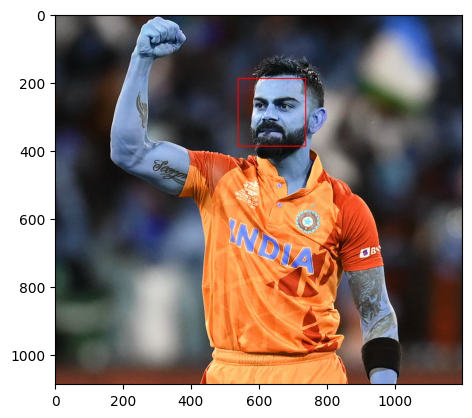

In [16]:
face_img = cv2.rectangle(img , (x,y) , (x+w , y+h) ,(255,0,0) , 2)
plt.imshow(face_img)

In [17]:
eye = eye_cascades.detectMultiScale(gray , 1.3,5)
eye

array([[645, 244,  52,  52],
       [582, 247,  44,  44]])

In [18]:
(x1,y1,w1,h1) = eye[0]
(x2,y2,w2,h2) = eye[1]
x1,y1,h1,w1

(645, 244, 52, 52)

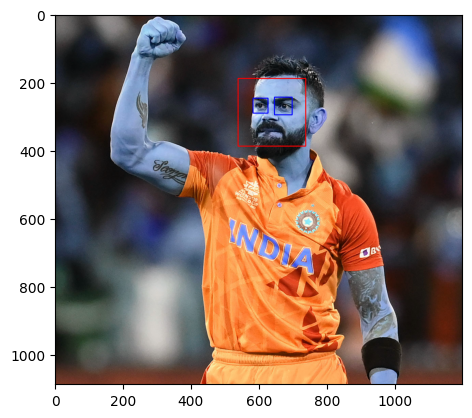

In [22]:
eye_img1 = cv2.rectangle(img , (x1,y1),(x1+w1 , y1+h1) , (0,0,255),2)
eye_img2 = cv2.rectangle(img , (x2,y2),(x2+w2 , y2+h2) , (0,0,255),2)

plt.imshow(eye_img2)